# Importing libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
path = r'D:\CF NHL Project\2 Data'

In [3]:
game_player_stats = pd.read_csv(os.path.join(path, 'Prepared Data', 'game_team_stat_merge_final.csv'), index_col = False)

In [4]:
#Enable visuals
%matplotlib inline

## Picking variables

In [5]:
game_player_stats.head()

,team_id,franchiseId,team_location,teamName,state_province,Country,abbreviation,game_id,home_or_away,won,...,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,venue,date
0,1,23,New Jersey,Devils,New Jersey,USA,NJD,2016020107,home,False,...,20162017,R,2016-10-28T23:30:00Z,16,1,3,2,away win OT,Prudential Center,10/28/2016
1,16,11,Chicago,Blackhawks,Illinois,USA,CHI,2016020107,away,True,...,20162017,R,2016-10-28T23:30:00Z,16,1,3,2,away win OT,Prudential Center,10/28/2016
2,1,23,New Jersey,Devils,New Jersey,USA,NJD,2015020981,home,False,...,20152016,R,2016-03-06T22:00:00Z,5,1,6,1,away win REG,Prudential Center,3/6/2016
3,5,17,Pittsburgh,Penguins,Pennsylvania,USA,PIT,2015020981,away,True,...,20152016,R,2016-03-06T22:00:00Z,5,1,6,1,away win REG,Prudential Center,3/6/2016
4,1,23,New Jersey,Devils,New Jersey,USA,NJD,2017020482,away,False,...,20172018,R,2017-12-15T00:30:00Z,1,8,1,2,home win OT,Centre Bell,12/15/2017


In [6]:
game_player_stats.columns

Index(['team_id', 'franchiseId', 'team_location', 'teamName', 'state_province',
       'Country', 'abbreviation', 'game_id', 'home_or_away', 'won',
       'settled_in', 'head_coach', 'goals', 'shots', 'team_hits', 'team_pim',
       'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage',
       'team_giveaways', 'team_takeaways', 'team_blocked', 'season', 'type',
       'date_time_GMT', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'venue', 'date'],
      dtype='object')

In [7]:
#making variable subset
game_player_sub = game_player_stats[['won', 'goals', 'shots', 'team_pim', 'team_blocked']]

In [8]:
game_player_sub

,won,goals,shots,team_pim,team_blocked
0,False,2.0,32.0,10.0,16
1,True,3.0,29.0,8.0,6
2,False,1.0,18.0,12.0,2
3,True,6.0,30.0,10.0,7
4,False,1.0,32.0,6.0,25
...,...,...,...,...,...
47455,False,3.0,33.0,4.0,13
47456,False,3.0,51.0,6.0,8
47457,True,4.0,25.0,12.0,26
47458,True,3.0,27.0,8.0,11


In [9]:
#Getting correlation
game_player_sub.corr()

,won,goals,shots,team_pim,team_blocked
won,1.000000,0.594930,0.027738,-0.040201,0.155098
goals,0.594930,1.000000,0.152930,0.044926,0.088568
shots,0.027738,0.152930,1.000000,-0.075914,-0.068171
team_pim,-0.040201,0.044926,-0.075914,1.000000,-0.060199
team_blocked,0.155098,0.088568,-0.068171,-0.060199,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

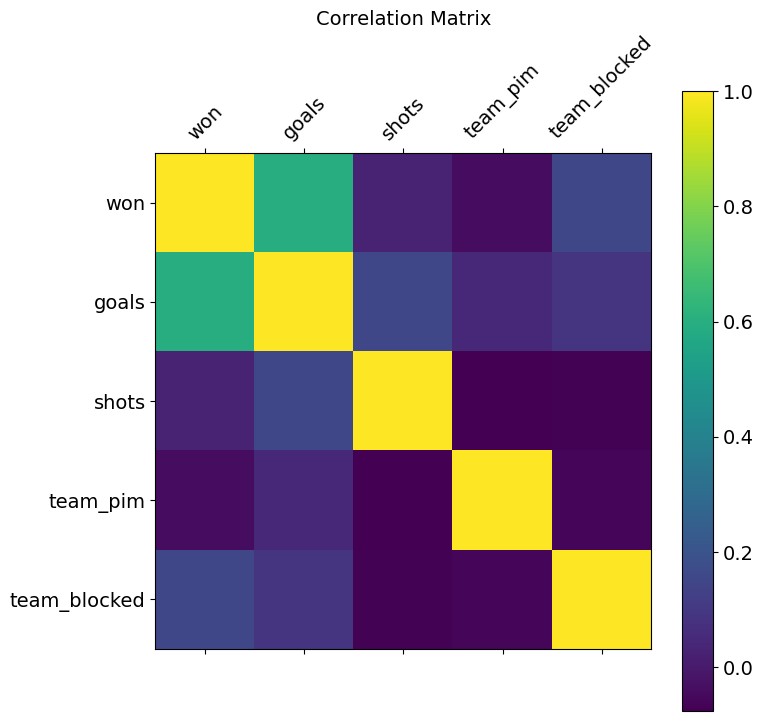

In [10]:
# Correlation heatmap test

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(game_player_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(game_player_sub.shape[1]), game_player_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(game_player_sub.shape[1]), game_player_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

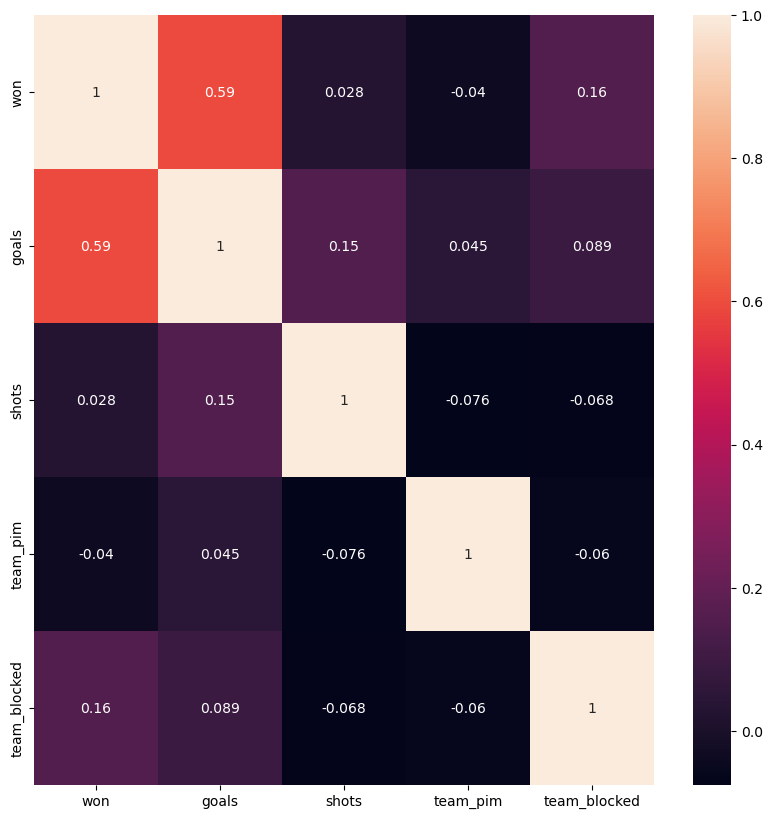

In [11]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(game_player_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [12]:
#Export viz
corr.figure.savefig(os.path.join(path, 'heatmap_2.png'))

In [15]:
#making updated variable subset
game_player_sub_2 = game_player_stats[['won', 'team_shots', 'team_pim', 'team_blocked']]

In [16]:
game_player_sub_2

,won,team_shots,team_pim,team_blocked
0,True,28.0,8.0,9.0
1,True,28.0,8.0,9.0
2,True,28.0,8.0,9.0
3,True,28.0,8.0,9.0
4,True,28.0,8.0,9.0
...,...,...,...,...
853309,False,33.0,0.0,7.0
853310,False,33.0,0.0,7.0
853311,False,33.0,0.0,7.0
853312,False,33.0,0.0,7.0


In [17]:
game_player_sub_2.corr()

,won,team_shots,team_pim,team_blocked
won,1.000000,0.025952,-0.040754,0.153791
team_shots,0.025952,1.000000,-0.078605,-0.074936
team_pim,-0.040754,-0.078605,1.000000,-0.059643
team_blocked,0.153791,-0.074936,-0.059643,1.000000


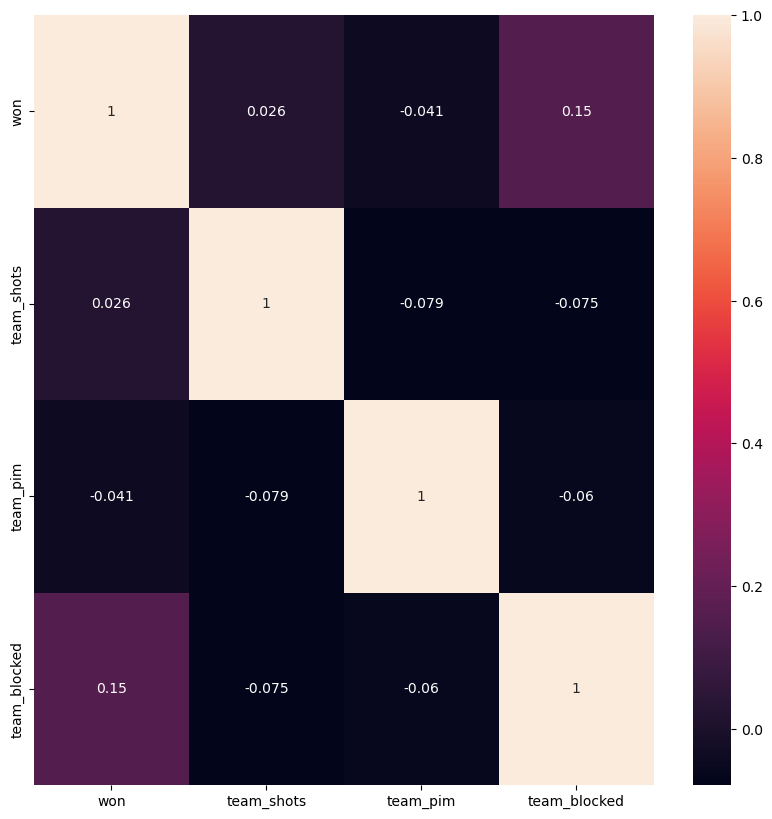

In [18]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(game_player_sub_2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

There are no strong correlations within the data I picked numberically but head coach and side shot from both are not numbers so there isn't a way to get the correlation to do a proper check with this method.

## Making scatterplots

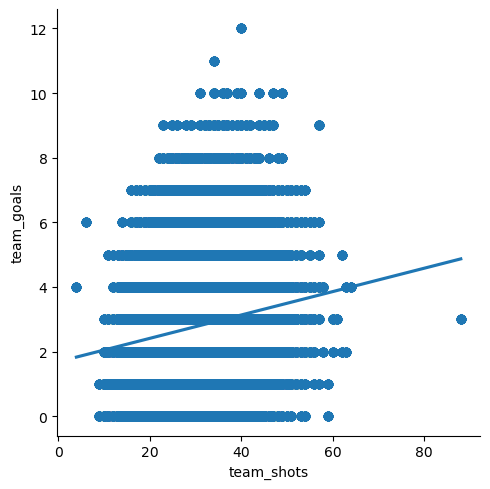

In [20]:
# Create a scatterplot for the "team goals" and "team shots" columns in seaborn

sns.lmplot(x = 'team_shots', y = 'team_goals', data = game_player_stats)

There is an upward trend with the data, so there is a little idea that the more shots a team has on goal the more likely they are to have higher goals.

## Pair-plot 

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


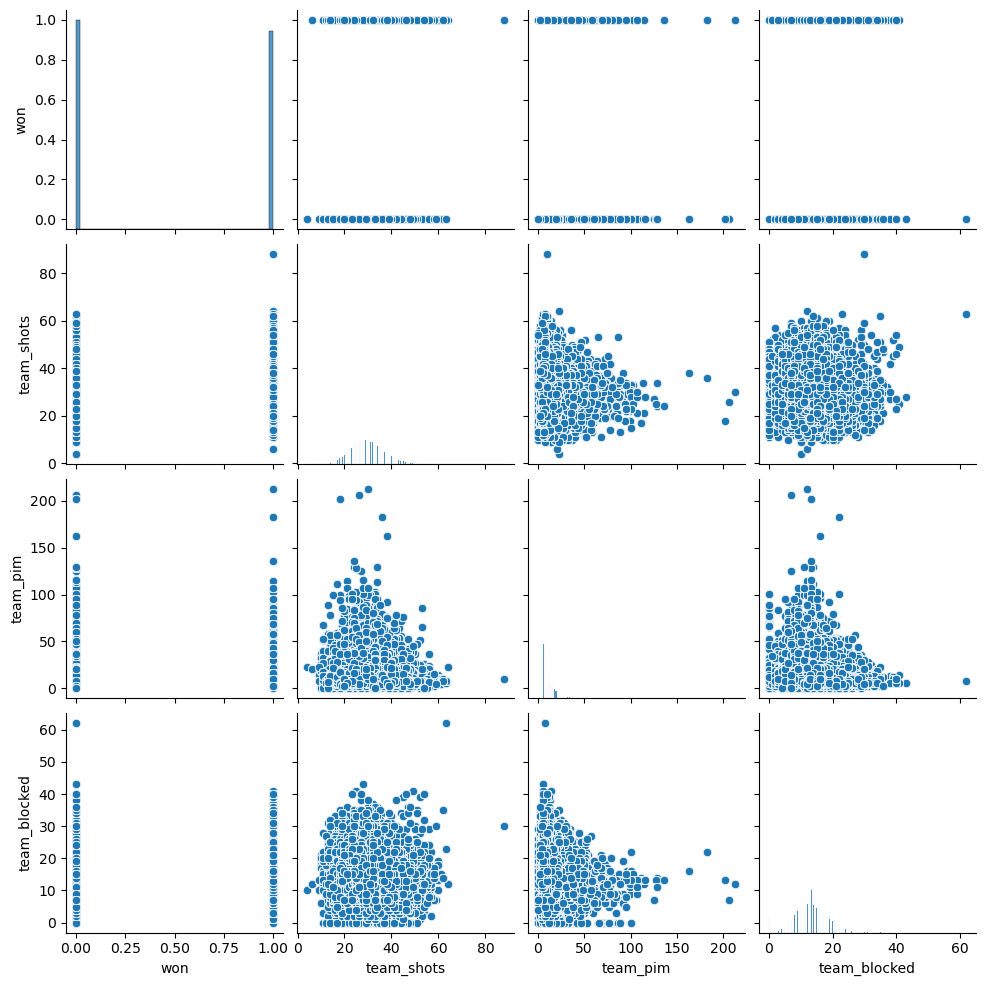

In [21]:
# Create a pair plot for first subset

g = sns.pairplot(game_player_sub_2)

Off the bat there isn't anything too noticeable able the data and there connection. The highest connections seem to be with team shots, pim, and blocked.

## Categorical Plots

<Axes: xlabel='team_shots', ylabel='Count'>

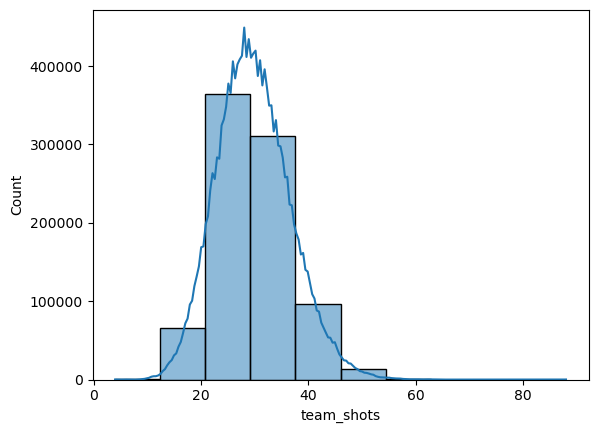

In [22]:
#Histogram for shots with a bin of 10
sns.histplot(game_player_stats['team_shots'], bins = 10, kde = True)

<Axes: xlabel='team_shots', ylabel='Count'>

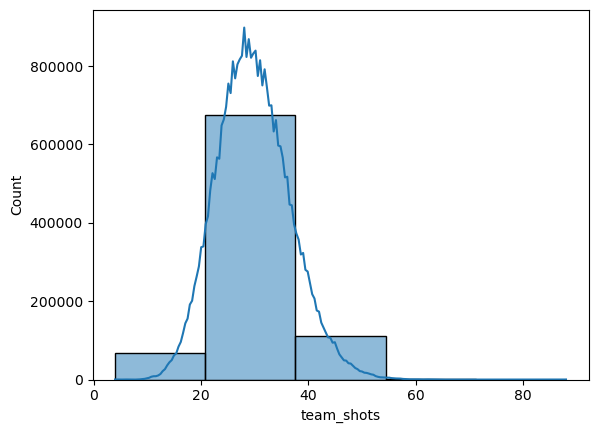

In [23]:
#Histogram for shots with a bin of 5
sns.histplot(game_player_stats['team_shots'], bins = 5, kde = True)

<Axes: xlabel='team_shots', ylabel='Count'>

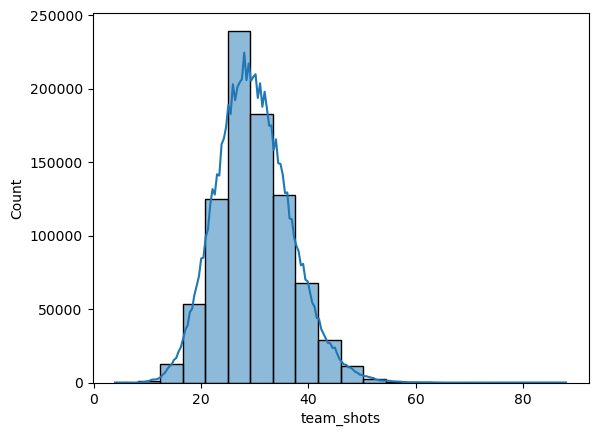

In [24]:
#Histogram for shots with a bin of 20
sns.histplot(game_player_stats['team_shots'], bins = 20, kde = True)

<Axes: xlabel='team_blocked', ylabel='Count'>

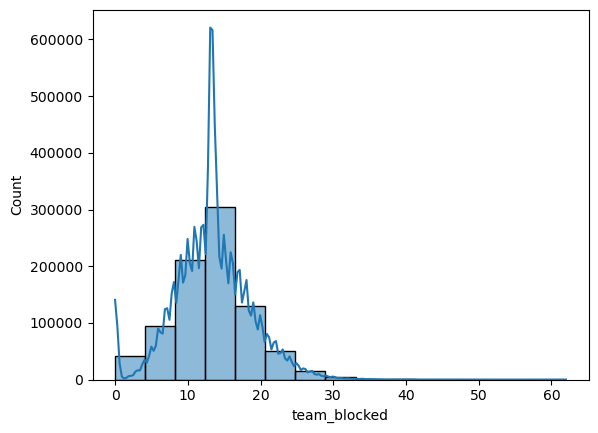

In [25]:
#Histogram for blocked with a bin of 15
sns.histplot(game_player_stats['team_blocked'], bins = 15, kde = True)

<Axes: xlabel='team_pim', ylabel='Count'>

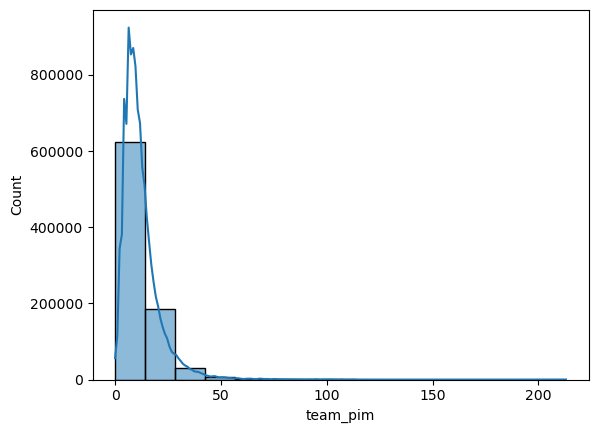

In [26]:
#Histogram for pim with a bin of 15
sns.histplot(game_player_stats['team_pim'], bins = 15, kde = True)

<Axes: xlabel='team_pim', ylabel='Count'>

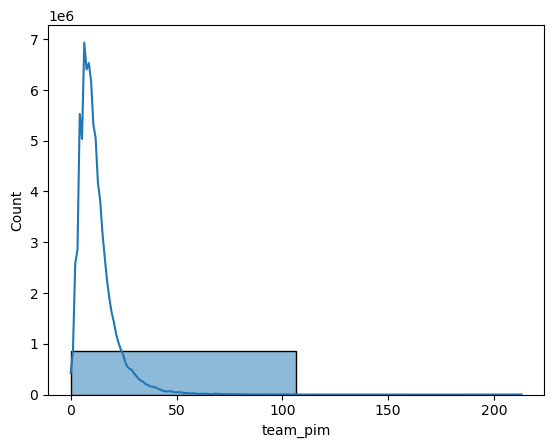

In [27]:
#Histogram for pim with a bin of 2
sns.histplot(game_player_stats['team_pim'], bins = 2, kde = True)

<Axes: xlabel='team_pim', ylabel='Count'>

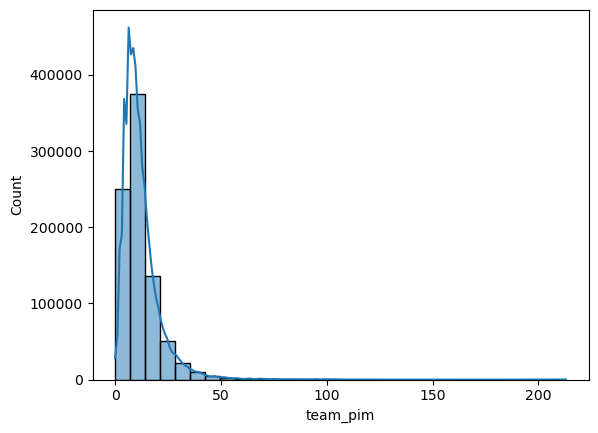

In [28]:
#Histogram for pim with a bin of 30
sns.histplot(game_player_stats['team_pim'], bins = 30, kde = True)

<Axes: xlabel='team_pim', ylabel='Count'>

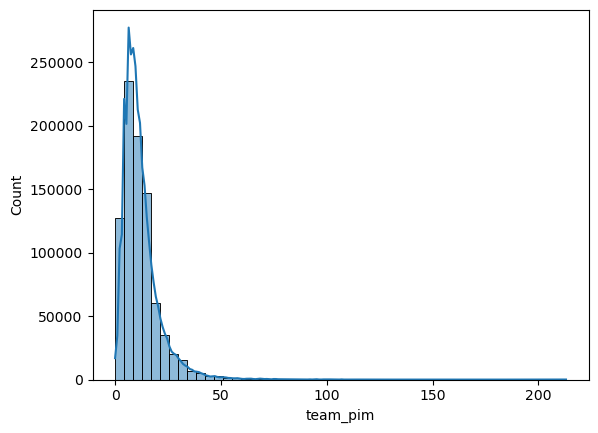

In [29]:
#Histogram for pim with a bin of 50
sns.histplot(game_player_stats['team_pim'], bins = 50, kde = True)

In [30]:
#Using describe to get a sense of low, middle, and high for shots, block, and pim
game_player_sub_2.describe()

,team_shots,team_pim,team_blocked
count,853314.000000,853314.000000,853314.000000
mean,29.787346,12.120497,13.228280
std,6.855214,9.213076,5.329373
min,4.000000,0.000000,0.000000
25%,25.000000,6.000000,10.000000
50%,29.000000,10.000000,13.317352
75%,34.000000,15.000000,16.000000
max,88.000000,213.000000,62.000000


### Shot flag and plot

In [31]:
#Making shot flag
game_player_stats.loc[game_player_stats['team_shots'] <=18, 'team_shot_flag'] = 'Low shot game'
game_player_stats.loc[(game_player_stats['team_shots'] > 18) & (game_player_stats['team_shots'] < 35), 'team_shot_flag'] = 'Average shot game'
game_player_stats.loc[game_player_stats['team_shots'] >= 35, 'team_shot_flag'] = 'High shot game'

In [32]:
#Checking team shot flag
game_player_stats['team_shot_flag'].value_counts()

Average shot game    618972
High shot game       201409
Low shot game         32933
Name: team_shot_flag, dtype: int64

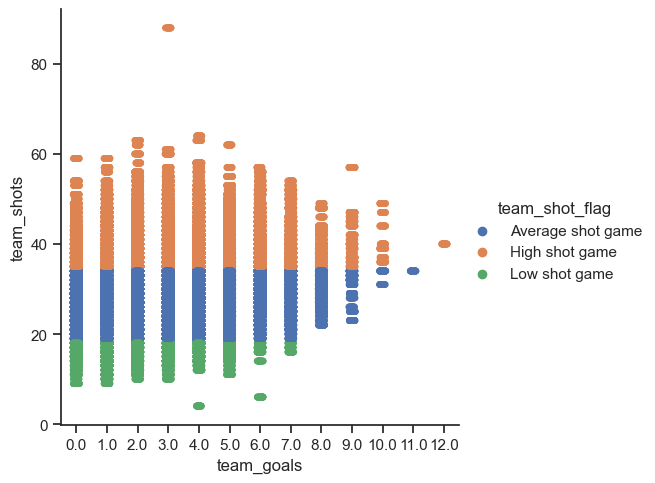

In [33]:
#Making ticks plot for team shot flag
sns.set(style="ticks")
g = sns.catplot(x="team_goals", y="team_shots", hue="team_shot_flag", data=game_player_stats)

I was expecting to see a lower distribution of low goal games the more shots that there were. Overall there is a fairly even spread for average shot games and high shot games. The low shot games met my expectations. The more goals a team has the more likely it is to fall in the average or high shot games.

### Blocked flag and plot

In [34]:
#Making blocked flag
game_player_stats.loc[game_player_stats['team_blocked'] <=8, 'team_blocked_flag'] = 'Low blocked game'
game_player_stats.loc[(game_player_stats['team_blocked'] > 8) & (game_player_stats['team_blocked'] < 18), 'team_blocked_flag'] = 'Average blocked game'
game_player_stats.loc[game_player_stats['team_blocked'] >= 18, 'team_blocked_flag'] = 'High blocked game'

In [35]:
#Checking team blocked flag
game_player_stats['team_blocked_flag'].value_counts()

Average blocked game    558735
High blocked game       158797
Low blocked game        135782
Name: team_blocked_flag, dtype: int64

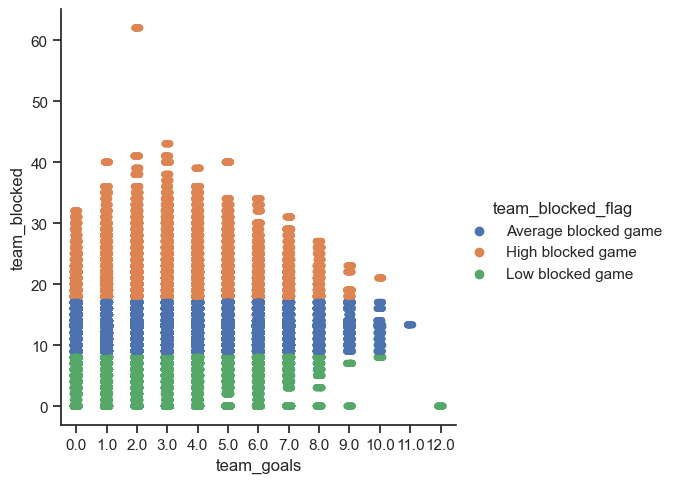

In [37]:
#Making ticks plot for team blocked flag
sns.set(style="ticks")
g = sns.catplot(x="team_goals", y="team_blocked", hue="team_blocked_flag", data=game_player_stats)

Overall this fell in line with my thinking for team blocked shots. I felt like the team that blocked more shots also would end up scoring more goals.

### PIM flag and plot

In [38]:
#Making PIM flag
game_player_stats.loc[game_player_stats['team_pim'] <=4, 'team_penalty_flag'] = 'Low penalty game'
game_player_stats.loc[(game_player_stats['team_pim'] > 4) & (game_player_stats['team_pim'] < 20), 'team_penalty_flag'] = 'Average penalty game'
game_player_stats.loc[game_player_stats['team_pim'] >= 20, 'team_penalty_flag'] = 'High penalty game'

In [39]:
#Checking team penalty flag
game_player_stats['team_penalty_flag'].value_counts()

Average penalty game    607813
Low penalty game        126892
High penalty game       118609
Name: team_penalty_flag, dtype: int64

C:\Users\sjvai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


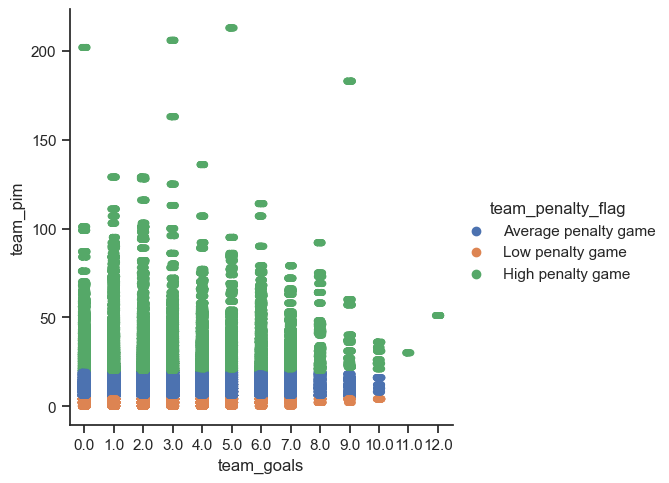

In [40]:
#Making ticks plot for team penalty flag
sns.set(style="ticks")
g = sns.catplot(x="team_goals", y="team_pim", hue="team_penalty_flag", data=game_player_stats)

This data gets a bit hard to use in this form of a graph because the high penalty outliers on the high end make the most sense. The higher spread comes in the more goals there are in the high penalty games makes sense since those tell me those games had high penalties because of the high goals. I am surprised to see that the low penalty games still had lower goal games. I was expecting to see more goals out of low penalty games.

## Key questions

A lot of my key questions were not able to be answered using some of these visuals as a lot of my questions revoled around the true false nature of the won column within my data. The tick graphs did help to provide some more ideas on my questions on other ways down the line I can look into and the creation of the flags will help with further research later on.

# Hypotheses

At this point I still don't have enough data for a hypothese I would feel comfortable with. The best I could do if based off the correlation and the "highest correlation" being shots to wins. I think I need to further explore the idea that some kind of shots data has an effect on wins.